In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_sub = pd.read_csv('subscribers_info.csv', sep=';')
data_test  = pd.read_csv('test.csv', sep=';')
data_week_cons = pd.read_csv('weekly_consumption.csv', sep=';')

### Табличка с информацией о сабах

In [3]:
data_sub.head()

,SUBSCRIBER_ID,PRICE_PLAN_CHANGE_DATE,STATUS,LT,LAST_DEVICE_CHANGE_DATE,CHANNEL,PRICE_PLAN_GROUP
0,0,2018-02-09 00:00:00,Active,5050.0,2017-09-30 21:51:15,dealer,PRICE_PLAN_GROUP_0
1,1,2017-10-02 00:00:00,Active,4786.0,2017-09-20 08:14:19,dealer,PRICE_PLAN_GROUP_0
2,2,2016-11-09 00:00:00,Non-active,5052.0,NaN,dealer,PRICE_PLAN_GROUP_1
3,3,2017-11-29 00:00:00,Active,4242.0,NaN,dealer,PRICE_PLAN_GROUP_0
4,4,2018-05-29 00:00:00,Active,5970.0,2017-10-09 09:43:06,dealer,PRICE_PLAN_GROUP_0


,SUBSCRIBER_ID,PRICE_PLAN_CHANGE_DATE,STATUS,LT,LAST_DEVICE_CHANGE_DATE,CHANNEL,PRICE_PLAN_GROUP
0,0,2018-02-09 00:00:00,Active,5050.0,2017-09-30 21:51:15,dealer,PRICE_PLAN_GROUP_0
1,1,2017-10-02 00:00:00,Active,4786.0,2017-09-20 08:14:19,dealer,PRICE_PLAN_GROUP_0
2,2,2016-11-09 00:00:00,Non-active,5052.0,NaN,dealer,PRICE_PLAN_GROUP_1
3,3,2017-11-29 00:00:00,Active,4242.0,NaN,dealer,PRICE_PLAN_GROUP_0
4,4,2018-05-29 00:00:00,Active,5970.0,2017-10-09 09:43:06,dealer,PRICE_PLAN_GROUP_0


### Табличка сабов для которых надо предсказать ARPU на 4 недели

In [4]:
data_test.head()

,SUBSCRIBER_ID
0,185586
1,172319
2,131695
3,183342
4,99269


,SUBSCRIBER_ID
0,185586
1,172319
2,131695
3,183342
4,99269


In [5]:
data_test.shape

(50000, 1)

(50000, 1)

### ТАбличка с 5 миллионами строк о понедельной информации о сабах

In [6]:
data_week_cons.head()

,SUBSCRIBER_ID,TIME_KEY,LAST_BALANCE,LT,SUM_RECHARGE,COUNT_RECHARGE,MAX_RECHARGE,MIN_RECHARGE,ARPU,AVG_BALANCE,...,TOTAL_OUT,TOTAL_IN,UNIQUE_NUMBERS,DAYS_IN_BLOCK,DAYS_WITH_TRANSACTIONS,OUT_ONNET,OUT_LOCAL_ONNET,OUT_LOCAL_OFFNET,IN_LOCAL_ONNET,IN_LOCAL_OFFNET
0,79201,2018-07-09,206.01,1564,0.00,0,0.0,0.00,81.69,241.01,...,117.9000,157.9333,22,0,7,102.1500,102.1500,14.4500,120.5333,8.7167
1,147319,2018-07-09,53.79,1421,490.02,3,300.0,90.02,234.69,132.62,...,83.4667,88.0500,21,0,7,67.5000,67.5000,6.2167,87.6833,0.3667
2,28408,2018-06-25,106.33,3100,300.00,1,300.0,300.00,262.00,122.90,...,37.0667,100.2500,19,0,7,13.3500,11.5500,21.1833,70.7333,25.2333
3,22306,2018-07-02,265.85,5123,150.00,1,150.0,150.00,81.69,215.14,...,32.9000,7.0833,15,0,7,0.6167,0.6167,30.7500,2.5167,4.5667
4,220112,2018-07-30,106.52,295,265.00,3,100.0,67.00,129.69,79.59,...,767.9167,633.9500,25,0,7,741.1667,740.6500,19.8000,613.2833,14.1167


,SUBSCRIBER_ID,TIME_KEY,LAST_BALANCE,LT,SUM_RECHARGE,COUNT_RECHARGE,MAX_RECHARGE,MIN_RECHARGE,ARPU,AVG_BALANCE,...,TOTAL_OUT,TOTAL_IN,UNIQUE_NUMBERS,DAYS_IN_BLOCK,DAYS_WITH_TRANSACTIONS,OUT_ONNET,OUT_LOCAL_ONNET,OUT_LOCAL_OFFNET,IN_LOCAL_ONNET,IN_LOCAL_OFFNET
0,79201,2018-07-09,206.01,1564,0.00,0,0.0,0.00,81.69,241.01,...,117.9000,157.9333,22,0,7,102.1500,102.1500,14.4500,120.5333,8.7167
1,147319,2018-07-09,53.79,1421,490.02,3,300.0,90.02,234.69,132.62,...,83.4667,88.0500,21,0,7,67.5000,67.5000,6.2167,87.6833,0.3667
2,28408,2018-06-25,106.33,3100,300.00,1,300.0,300.00,262.00,122.90,...,37.0667,100.2500,19,0,7,13.3500,11.5500,21.1833,70.7333,25.2333
3,22306,2018-07-02,265.85,5123,150.00,1,150.0,150.00,81.69,215.14,...,32.9000,7.0833,15,0,7,0.6167,0.6167,30.7500,2.5167,4.5667
4,220112,2018-07-30,106.52,295,265.00,3,100.0,67.00,129.69,79.59,...,767.9167,633.9500,25,0,7,741.1667,740.6500,19.8000,613.2833,14.1167


In [7]:
data_week_cons.shape

(5270704, 26)

(5270704, 26)

### Соединяем таблички и пробуем предсказывать arpu стоковым катбустом

In [8]:
data = pd.merge(data_week_cons, data_sub,  how="right", on='SUBSCRIBER_ID')

In [9]:
del data_week_cons

In [10]:
data.dropna(subset=['TIME_KEY'], inplace = True) # droping 38 nan rows

In [11]:
data.shape

(5270704, 32)

(5270704, 32)

In [12]:
#X = data.drop(['TIME_KEY', 'LT_y', 'LAST_DEVICE_CHANGE_DATE','PRICE_PLAN_CHANGE_DATE', 'ARPU'], axis = 1)

In [13]:
#y = data.ARPU.values

In [14]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [15]:
data.head()

,SUBSCRIBER_ID,TIME_KEY,LAST_BALANCE,LT_x,SUM_RECHARGE,COUNT_RECHARGE,MAX_RECHARGE,MIN_RECHARGE,ARPU,AVG_BALANCE,...,OUT_LOCAL_ONNET,OUT_LOCAL_OFFNET,IN_LOCAL_ONNET,IN_LOCAL_OFFNET,PRICE_PLAN_CHANGE_DATE,STATUS,LT_y,LAST_DEVICE_CHANGE_DATE,CHANNEL,PRICE_PLAN_GROUP
0,79201,2018-07-09,206.01,1564.0,0.0,0.0,0.0,0.0,81.69,241.01,...,102.1500,14.4500,120.5333,8.7167,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
1,79201,2018-03-12,186.00,1445.0,0.0,0.0,0.0,0.0,87.50,227.50,...,272.7667,4.1000,143.8500,21.4167,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
2,79201,2018-07-30,278.01,1585.0,350.0,1.0,350.0,350.0,118.19,218.23,...,405.3333,52.3333,181.4667,5.4167,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
3,79201,2018-04-02,252.84,1466.0,360.0,1.0,360.0,360.0,81.69,287.84,...,172.3000,4.0167,249.4500,7.9333,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
4,79201,2018-05-14,95.84,1508.0,0.0,0.0,0.0,0.0,107.19,145.84,...,218.3333,2.7667,95.4833,4.6500,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0


,SUBSCRIBER_ID,TIME_KEY,LAST_BALANCE,LT_x,SUM_RECHARGE,COUNT_RECHARGE,MAX_RECHARGE,MIN_RECHARGE,ARPU,AVG_BALANCE,...,OUT_LOCAL_ONNET,OUT_LOCAL_OFFNET,IN_LOCAL_ONNET,IN_LOCAL_OFFNET,PRICE_PLAN_CHANGE_DATE,STATUS,LT_y,LAST_DEVICE_CHANGE_DATE,CHANNEL,PRICE_PLAN_GROUP
0,79201,2018-07-09,206.01,1564.0,0.0,0.0,0.0,0.0,81.69,241.01,...,102.1500,14.4500,120.5333,8.7167,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
1,79201,2018-03-12,186.00,1445.0,0.0,0.0,0.0,0.0,87.50,227.50,...,272.7667,4.1000,143.8500,21.4167,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
2,79201,2018-07-30,278.01,1585.0,350.0,1.0,350.0,350.0,118.19,218.23,...,405.3333,52.3333,181.4667,5.4167,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
3,79201,2018-04-02,252.84,1466.0,360.0,1.0,360.0,360.0,81.69,287.84,...,172.3000,4.0167,249.4500,7.9333,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0
4,79201,2018-05-14,95.84,1508.0,0.0,0.0,0.0,0.0,107.19,145.84,...,218.3333,2.7667,95.4833,4.6500,2017-12-23 00:00:00,Active,1519.0,2017-12-07 08:34:36,franchise,PRICE_PLAN_GROUP_0


In [16]:
data.shape

(5270704, 32)

(5270704, 32)

In [17]:
data.TIME_KEY = pd.to_datetime(data.TIME_KEY) # creating month and day of info feature
#data["month"] = data.TIME_KEY.map(lambda x: x.month)
#data["day"] = data.TIME_KEY.map(lambda x: x.day)
#data.drop(columns=['TIME_KEY'], inplace=True)

In [18]:
data.sort_values(by = 'TIME_KEY', inplace = True)

In [19]:
#plt.plot(data[data.SUBSCRIBER_ID == 79201].TIME_KEY, data[data.SUBSCRIBER_ID == 79201].ARPU)

In [20]:
#data = data[(data.ARPU > 0) & (data.ARPU < 600)] # clrearing data

In [21]:
#plt.figure(dpi = 100)
#sns.distplot(data.ARPU.values)
#plt.title('ARPU')

In [22]:
data.drop('LT_y', axis = 1, inplace = True) # constant for each customer

In [23]:
X = pd.DataFrame(index=data.SUBSCRIBER_ID.unique())

In [24]:
X["LT"] = data.groupby(by="SUBSCRIBER_ID").LT_x.max()

In [25]:
X['mean_recharge'] = data.groupby(by="SUBSCRIBER_ID").SUM_RECHARGE.mean()

In [26]:
X['sum_rechrges'] = data.groupby(by="SUBSCRIBER_ID").COUNT_RECHARGE.sum()

In [27]:
X['mean_max_recharge'] = data.groupby(by="SUBSCRIBER_ID").MAX_RECHARGE.mean()

In [28]:
X['mean_min_recharge'] = data.groupby(by="SUBSCRIBER_ID").MIN_RECHARGE.mean()

In [29]:
#X['mean_ARPU'] = data.groupby(by="SUBSCRIBER_ID").ARPU.mean()


In [30]:
X['mean_balance'] = data.groupby(by="SUBSCRIBER_ID").AVG_BALANCE.mean()

In [31]:
X['mean_max_balance'] = data.groupby(by="SUBSCRIBER_ID").MAX_BALANCE.mean()

In [32]:
X['mean_min_balance'] = data.groupby(by="SUBSCRIBER_ID").MIN_BALANCE.mean()

In [33]:
X['mean_AVG_BALANCE_BEFORE_RECHARGE'] = data.groupby(by="SUBSCRIBER_ID").AVG_BALANCE_BEFORE_RECHARGE.mean()

In [34]:
X['mean_HOURS_FROM_LAST_RECHARGE'] = data.groupby(by="SUBSCRIBER_ID").HOURS_FROM_LAST_RECHARGE.mean()

In [35]:
X['mean_traffic'] = data.groupby(by="SUBSCRIBER_ID").DATA_TRAFFIC.mean()

In [36]:
X['mean_COUNT_SMS_OUT'] = data.groupby(by="SUBSCRIBER_ID").COUNT_SMS_OUT.mean()

In [37]:
X['mean_TOTAL_OUT'] = data.groupby(by="SUBSCRIBER_ID").TOTAL_OUT.mean()

In [38]:
X['mean_TOTAL_IN'] = data.groupby(by="SUBSCRIBER_ID").TOTAL_IN.mean()

In [39]:
X['mean_UNIQUE_NUM'] = data.groupby(by="SUBSCRIBER_ID").UNIQUE_NUMBERS.mean()

In [40]:
X['mean_DAYS_IN_BLOCK'] = data.groupby(by="SUBSCRIBER_ID").DAYS_IN_BLOCK.mean()

In [41]:
X['mean_DAYS_WITH_TRANSACTIONS'] = data.groupby(by="SUBSCRIBER_ID").DAYS_WITH_TRANSACTIONS.mean()

In [42]:
X['mean_OUT_ONNET'] = data.groupby(by="SUBSCRIBER_ID").OUT_ONNET.mean()

In [43]:
X['mean_OUT_LOCAL_ONNET'] = data.groupby(by="SUBSCRIBER_ID").OUT_LOCAL_ONNET.mean()

In [44]:
X['mean_OUT_LOCAL_OFFNET'] = data.groupby(by="SUBSCRIBER_ID").OUT_LOCAL_OFFNET.mean()

In [45]:
X['mean_IN_LOCAL_ONNET'] = data.groupby(by="SUBSCRIBER_ID").IN_LOCAL_ONNET.mean()

In [46]:
X['mean_IN_LOCAL_OFFNET'] = data.groupby(by="SUBSCRIBER_ID").IN_LOCAL_OFFNET.mean()

In [47]:
data.STATUS = data.STATUS.apply(lambda x: 1 if x == "active" else 0)

In [48]:
X['status'] = data.groupby(by="SUBSCRIBER_ID").STATUS.max()

In [49]:
data.LAST_DEVICE_CHANGE_DATE = pd.to_datetime(data.LAST_DEVICE_CHANGE_DATE)

In [50]:
data['days_from_dev_ch'] = data['TIME_KEY'].subtract(data['LAST_DEVICE_CHANGE_DATE']).astype('timedelta64[D]')

In [51]:
X['days_from_dev_ch'] = data.groupby(by="SUBSCRIBER_ID").days_from_dev_ch.max()

In [52]:
data = pd.get_dummies(data, drop_first=True, prefix=["chanel"],columns=["CHANNEL"])

In [53]:
for i in ['chanel_b2c_agent',
       'chanel_dealer', 'chanel_digital', 'chanel_electronics_store',
       'chanel_franchise', 'chanel_own_office', 'chanel_retail_evroset',
       'chanel_retail_other', 'chanel_retail_svyaznoy', 'chanel_sampling']:
    X[i] = data.groupby(by="SUBSCRIBER_ID")[i].max()

In [54]:
data = pd.get_dummies(data, drop_first=True,columns=["PRICE_PLAN_GROUP"])

In [55]:
for i in ['PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_1',
       'PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_2',
       'PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_3']:
    X[i] = data.groupby(by="SUBSCRIBER_ID")[i].max()

In [56]:
X = X.fillna(X.mean())

In [57]:
X.isna().sum()

LT                                     0
mean_recharge                          0
sum_rechrges                           0
mean_max_recharge                      0
mean_min_recharge                      0
mean_balance                           0
mean_max_balance                       0
mean_min_balance                       0
mean_AVG_BALANCE_BEFORE_RECHARGE       0
mean_HOURS_FROM_LAST_RECHARGE          0
mean_traffic                           0
mean_COUNT_SMS_OUT                     0
mean_TOTAL_OUT                         0
mean_TOTAL_IN                          0
mean_UNIQUE_NUM                        0
mean_DAYS_IN_BLOCK                     0
mean_DAYS_WITH_TRANSACTIONS            0
mean_OUT_ONNET                         0
mean_OUT_LOCAL_ONNET                   0
mean_OUT_LOCAL_OFFNET                  0
mean_IN_LOCAL_ONNET                    0
mean_IN_LOCAL_OFFNET                   0
status                                 0
days_from_dev_ch                       0
chanel_b2c_agent

LT                                     0
mean_recharge                          0
sum_rechrges                           0
mean_max_recharge                      0
mean_min_recharge                      0
mean_balance                           0
mean_max_balance                       0
mean_min_balance                       0
mean_AVG_BALANCE_BEFORE_RECHARGE       0
mean_HOURS_FROM_LAST_RECHARGE          0
mean_traffic                           0
mean_COUNT_SMS_OUT                     0
mean_TOTAL_OUT                         0
mean_TOTAL_IN                          0
mean_UNIQUE_NUM                        0
mean_DAYS_IN_BLOCK                     0
mean_DAYS_WITH_TRANSACTIONS            0
mean_OUT_ONNET                         0
mean_OUT_LOCAL_ONNET                   0
mean_OUT_LOCAL_OFFNET                  0
mean_IN_LOCAL_ONNET                    0
mean_IN_LOCAL_OFFNET                   0
status                                 0
days_from_dev_ch                       0
chanel_b2c_agent

In [58]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [59]:
#!pip install umap

In [61]:
import umap
clusterable_embedding = umap.UMAP(
    #n_neighbors=30,
    #min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(X_std)

/Users/saveliykholin/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
/Users/saveliykholin/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/saveliykholin/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
/Users/saveliykholin/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


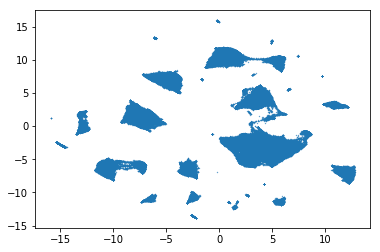

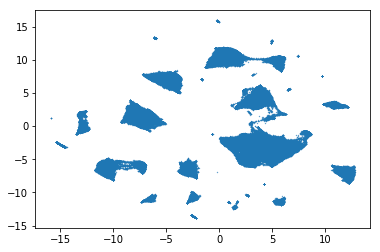

In [62]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1, cmap='Spectral');

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit_transform(X_std)

In [79]:
umap = umap.UMAP(
    #n_neighbors=30,
    #min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(pca)

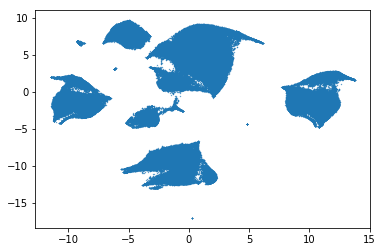

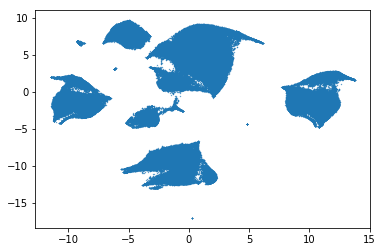

In [80]:
plt.scatter(umap[:, 0], umap[:, 1], s=0.1, cmap='Spectral');

In [81]:
X["pcaumap0"] = umap[:, 0]
X["pcaumap1"] = umap[:, 1]

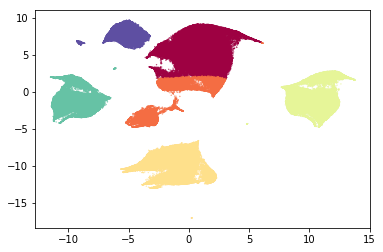

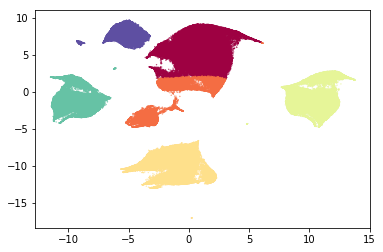

In [91]:
pcaumap = pd.DataFrame(index = X.index)
pcaumap['x'] = umap[:, 0]
pcaumap['y'] = umap[:, 1]
from sklearn.mixture import GaussianMixture

pcaumap['cluster'] = GaussianMixture(n_components=6, max_iter = 100).fit_predict(pcaumap)
plt.scatter(pcaumap.x,pcaumap.y, s=0.1, cmap='Spectral', c = pcaumap['cluster']);

In [92]:
pcaumap.to_csv('pcaumap.csv', index = False)

In [ ]:
X["umap0"] = clusterable_embedding[:, 0]
X["umap1"] = clusterable_embedding[:, 1]

In [ ]:
from sklearn.mixture import GaussianMixture

labels = GaussianMixture(n_components=8).fit_predict(embed)

In [ ]:
plt.scatter(embed['umap0'], embed['umap1'], s=0.1, cmap='Spectral', c = labels);

In [104]:
pcaumap.drop('sub', axis = 1, inplace= True)
pcaumap['SUBSCRIBER_ID'] = pcaumap.index


In [105]:
pcaumap.head()

,x,y,cluster,SUBSCRIBER_ID
227111,-8.282953,-3.178072,4,227111
155600,2.191787,7.421016,0,155600
18505,-7.984584,-0.283080,4,18505
132452,11.633231,-2.305085,3,132452
62851,10.977854,-4.192509,3,62851


,x,y,cluster,SUBSCRIBER_ID
227111,-8.282953,-3.178072,4,227111
155600,2.191787,7.421016,0,155600
18505,-7.984584,-0.283080,4,18505
132452,11.633231,-2.305085,3,132452
62851,10.977854,-4.192509,3,62851


In [106]:
data = pd.merge(data, pcaumap,  how="right", on='SUBSCRIBER_ID')

In [111]:
data.head()

,SUBSCRIBER_ID,TIME_KEY,LAST_BALANCE,LT_x,SUM_RECHARGE,COUNT_RECHARGE,MAX_RECHARGE,MIN_RECHARGE,ARPU,AVG_BALANCE,...,chanel_retail_evroset,chanel_retail_other,chanel_retail_svyaznoy,chanel_sampling,PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_1,PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_2,PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_3,x,y,cluster
0,227111,2018-03-05,47.78,827.0,0.0,0.0,0.0,0.0,0.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
1,227111,2018-03-12,547.78,834.0,500.0,1.0,500.0,500.0,0.0,119.21,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
2,227111,2018-03-19,47.78,841.0,0.0,0.0,0.0,0.0,500.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
3,227111,2018-03-26,47.78,848.0,0.0,0.0,0.0,0.0,0.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
4,227111,2018-04-02,47.78,855.0,0.0,0.0,0.0,0.0,0.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4


,SUBSCRIBER_ID,TIME_KEY,LAST_BALANCE,LT_x,SUM_RECHARGE,COUNT_RECHARGE,MAX_RECHARGE,MIN_RECHARGE,ARPU,AVG_BALANCE,...,chanel_retail_evroset,chanel_retail_other,chanel_retail_svyaznoy,chanel_sampling,PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_1,PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_2,PRICE_PLAN_GROUP_PRICE_PLAN_GROUP_3,x,y,cluster
0,227111,2018-03-05,47.78,827.0,0.0,0.0,0.0,0.0,0.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
1,227111,2018-03-12,547.78,834.0,500.0,1.0,500.0,500.0,0.0,119.21,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
2,227111,2018-03-19,47.78,841.0,0.0,0.0,0.0,0.0,500.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
3,227111,2018-03-26,47.78,848.0,0.0,0.0,0.0,0.0,0.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4
4,227111,2018-04-02,47.78,855.0,0.0,0.0,0.0,0.0,0.0,47.78,...,0,0,0,0,1,0,0,-8.282953,-3.178072,4


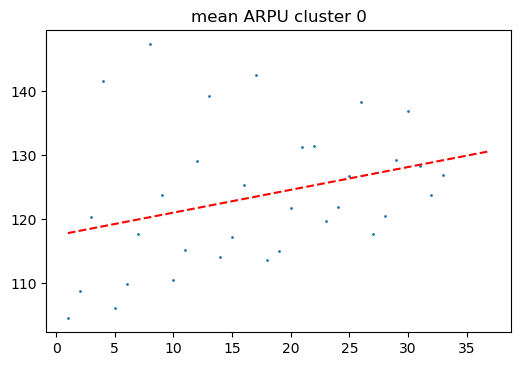

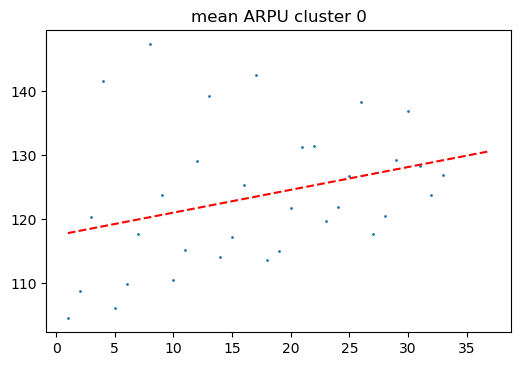

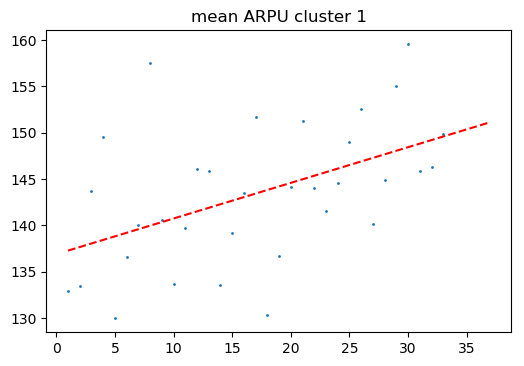

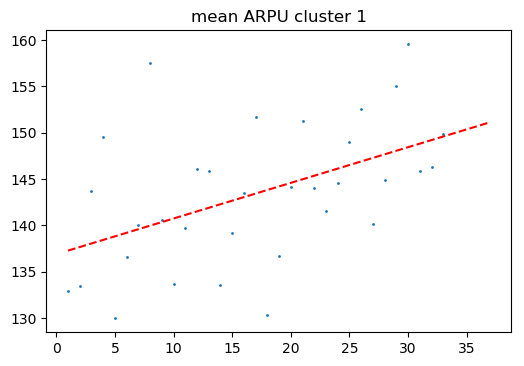

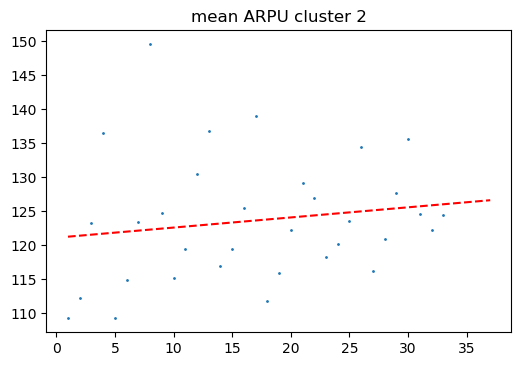

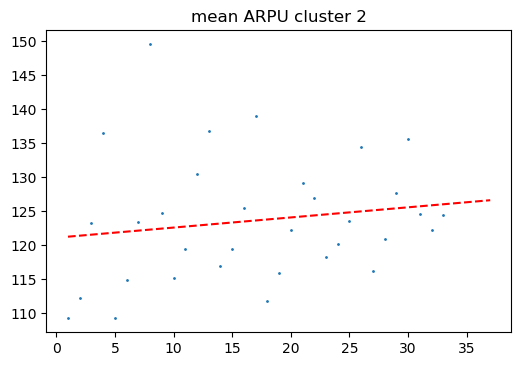

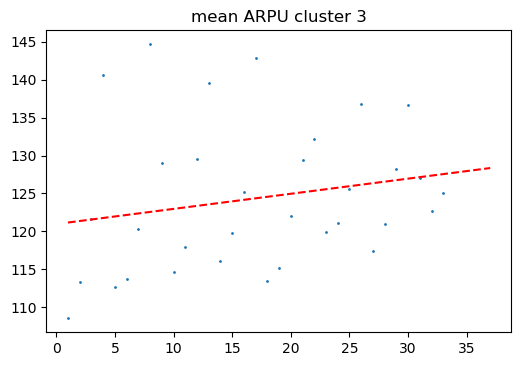

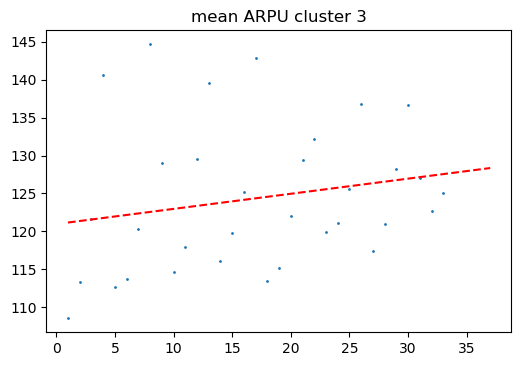

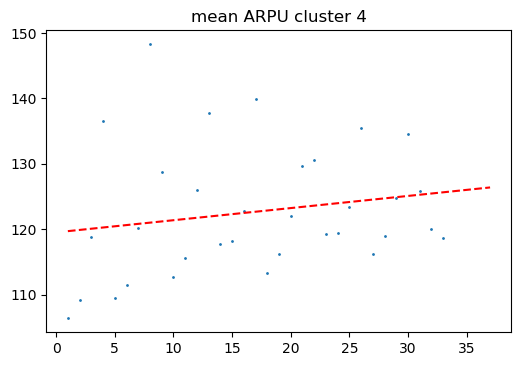

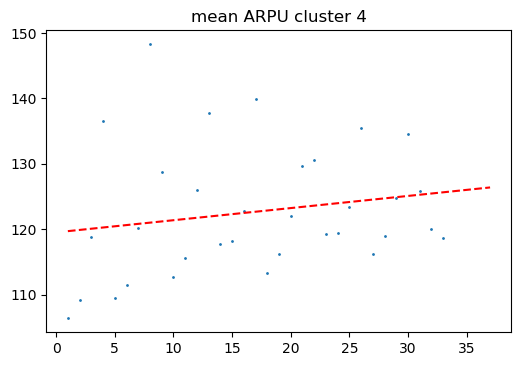

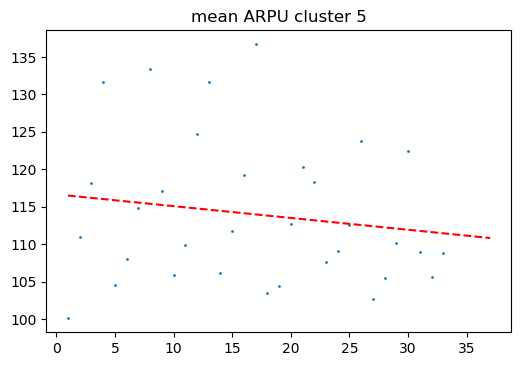

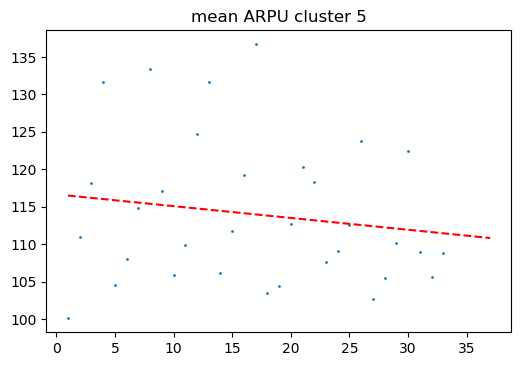

In [157]:
timeline_w = np.arange(1, 34)
predicted_ARPU = {}
for i in range(6):
    plt.figure(dpi = 100)
    plt.title('mean ARPU cluster {}'.format(i))
    z = np.polyfit(timeline_w, data[data.cluster == i].groupby(by='TIME_KEY').ARPU.mean(), 1)
    p = np.poly1d(z)
    
    predicted_ARPU[str(i)] = p(34)+p(35)+p(36)+p(37)
    
    plt.plot(np.arange(1, 38), p(np.arange(1, 38)), 'r--')
    plt.scatter(timeline_w, data[data.cluster == i].groupby(by='TIME_KEY').ARPU.mean(), s = 1)
    plt.savefig('mean ARPU cluster {}.png'.format(i))

In [154]:
timeline = np.arange(data[data.cluster == i].TIME_KEY.unique().min(),
          data[data.cluster == i].TIME_KEY.unique().max()+ np.timedelta64(1, 'W'), 
          np.timedelta64(1, 'W'),  dtype='datetime64[D]')

## ARPU for next 4 weeks

In [158]:
predicted_ARPU

{'0': 520.4176938873924,
 '1': 602.2122723586305,
 '2': 505.5407432686521,
 '3': 512.1977189528868,
 '4': 504.4167195003957,
 '5': 444.27999244982647}

{'0': 520.4176938873924,
 '1': 602.2122723586305,
 '2': 505.5407432686521,
 '3': 512.1977189528868,
 '4': 504.4167195003957,
 '5': 444.27999244982647}

In [163]:
data[data.cluster == 2].groupby(by='TIME_KEY').ARPU.mean().values

array([109.19802219, 112.23825927, 123.22662911, 136.4903976 ,
       109.31254206, 114.86889966, 123.35170855, 149.59638573,
       124.77924548, 115.14812442, 119.50004481, 130.3974573 ,
       136.73651069, 116.99807923, 119.43116701, 125.41566653,
       138.94592119, 111.76418955, 115.89048406, 122.1871023 ,
       129.11867388, 126.89465687, 118.19092664, 120.17818717,
       123.58147217, 134.43970965, 116.25790136, 120.96049381,
       127.66248565, 135.65961737, 124.55979693, 122.17264586,
       124.50345092])

array([109.19802219, 112.23825927, 123.22662911, 136.4903976 ,
       109.31254206, 114.86889966, 123.35170855, 149.59638573,
       124.77924548, 115.14812442, 119.50004481, 130.3974573 ,
       136.73651069, 116.99807923, 119.43116701, 125.41566653,
       138.94592119, 111.76418955, 115.89048406, 122.1871023 ,
       129.11867388, 126.89465687, 118.19092664, 120.17818717,
       123.58147217, 134.43970965, 116.25790136, 120.96049381,
       127.66248565, 135.65961737, 124.55979693, 122.17264586,
       124.50345092])

In [166]:
z = np.polyfit(timeline_w, data[data.cluster == 2].groupby(by='TIME_KEY').ARPU.mean().values, 1)
p = np.poly1d(z)
(data[data.cluster == 2].groupby(by='TIME_KEY').ARPU.mean().values - p(timeline_w)).std()/data[data.cluster == 2].groupby(by='TIME_KEY').ARPU.mean().values.mean()

0.07219191965361707

0.07219191965361707